In [1]:
import pandas as pd
df = pd.read_csv("stocks.csv") 
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values(by=['Ticker', 'Date'])
missing_values = df.isnull().sum()
print("Missing values:\n", missing_values)
duplicates = df.duplicated().sum()
print("Duplicate rows:", duplicates)
df = df.drop_duplicates()
df.set_index('Date', inplace=True)
print(df.head())



Missing values:
 Ticker       0
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64
Duplicate rows: 0
           Ticker        Open        High         Low       Close   Adj Close  \
Date                                                                            
2023-02-07   AAPL  150.639999  155.229996  150.639999  154.649994  154.414230   
2023-02-08   AAPL  153.880005  154.580002  151.169998  151.919998  151.688400   
2023-02-09   AAPL  153.779999  154.330002  150.419998  150.869995  150.639999   
2023-02-10   AAPL  149.460007  151.339996  149.220001  151.009995  151.009995   
2023-02-13   AAPL  150.949997  154.259995  150.919998  153.850006  153.850006   

              Volume  
Date                  
2023-02-07  83322600  
2023-02-08  64120100  
2023-02-09  56007100  
2023-02-10  57450700  
2023-02-13  62199000  


In [2]:
Q1 = df['Volume'].quantile(0.25)
Q3 = df['Volume'].quantile(0.75)
IQR = Q3 - Q1
volume_filter = (df['Volume'] >= Q1 - 1.5 * IQR) & (df['Volume'] <= Q3 + 1.5 * IQR)
df = df[volume_filter]
print("Data after removing volume outliers:")
print(df.head())


Data after removing volume outliers:
           Ticker        Open        High         Low       Close   Adj Close  \
Date                                                                            
2023-02-07   AAPL  150.639999  155.229996  150.639999  154.649994  154.414230   
2023-02-08   AAPL  153.880005  154.580002  151.169998  151.919998  151.688400   
2023-02-09   AAPL  153.779999  154.330002  150.419998  150.869995  150.639999   
2023-02-10   AAPL  149.460007  151.339996  149.220001  151.009995  151.009995   
2023-02-13   AAPL  150.949997  154.259995  150.919998  153.850006  153.850006   

              Volume  
Date                  
2023-02-07  83322600  
2023-02-08  64120100  
2023-02-09  56007100  
2023-02-10  57450700  
2023-02-13  62199000  


In [3]:
price_columns = ['Open', 'High', 'Low', 'Close', 'Adj Close']
for col in price_columns:
    df = df[df[col] > 0] 
print(df[price_columns].dtypes)
print(df.describe())

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
dtype: object
             Open        High         Low       Close   Adj Close  \
count  245.000000  245.000000  245.000000  245.000000  245.000000   
mean   216.142527  218.826229  213.592114  216.288265  216.269057   
std     91.834400   93.001104   90.258971   91.576611   91.569482   
min     89.540001   90.129997   88.860001   89.349998   89.349998   
25%    144.380005  146.710007  143.899994  145.309998  145.309998   
50%    247.399994  251.000000  245.729996  248.589996  248.589996   
75%    304.679993  307.760010  296.000000  304.399994  304.399994   
max    372.410004  373.829987  361.739990  366.829987  366.829987   

             Volume  
count  2.450000e+02  
mean   3.120940e+07  
std    2.100464e+07  
min    2.657900e+06  
25%    1.711630e+07  
50%    2.684020e+07  
75%    4.720480e+07  
max    8.755800e+07  


In [4]:
ticker_summary = df.groupby('Ticker')[['Open', 'Close', 'Volume']].agg(['mean', 'max', 'min'])
print("Ticker-wise Summary:\n", ticker_summary)


Ticker-wise Summary:
               Open                               Close              \
              mean         max         min        mean         max   
Ticker                                                               
AAPL    157.588167  170.089996  144.380005  158.039166  169.679993   
GOOG    100.379328  107.800003   89.540001  100.716312  109.459999   
MSFT    274.735969  307.760010  246.550003  275.039839  310.649994   
NFLX    328.110643  372.410004  287.339996  327.614677  366.829987   

                          Volume                      
               min          mean       max       min  
Ticker                                                
AAPL    145.309998  5.875471e+07  87558000  41516200  
GOOG     89.349998  2.962581e+07  76140300  16732000  
MSFT    246.270004  3.084835e+07  69527400  17150300  
NFLX    292.760010  6.471732e+06  22128300   2657900  


In [5]:
df_reset = df.reset_index().sort_values(by=['Ticker', 'Date'])
print("Organized Table Format:\n", df_reset.head())


Organized Table Format:
         Date Ticker        Open        High         Low       Close  \
0 2023-02-07   AAPL  150.639999  155.229996  150.639999  154.649994   
1 2023-02-08   AAPL  153.880005  154.580002  151.169998  151.919998   
2 2023-02-09   AAPL  153.779999  154.330002  150.419998  150.869995   
3 2023-02-10   AAPL  149.460007  151.339996  149.220001  151.009995   
4 2023-02-13   AAPL  150.949997  154.259995  150.919998  153.850006   

    Adj Close    Volume  
0  154.414230  83322600  
1  151.688400  64120100  
2  150.639999  56007100  
3  151.009995  57450700  
4  153.850006  62199000  


In [6]:
ticker_dfs = {ticker: data for ticker, data in df.groupby('Ticker')}
print("AAPL Data:\n", ticker_dfs['AAPL'].head())


AAPL Data:
            Ticker        Open        High         Low       Close   Adj Close  \
Date                                                                            
2023-02-07   AAPL  150.639999  155.229996  150.639999  154.649994  154.414230   
2023-02-08   AAPL  153.880005  154.580002  151.169998  151.919998  151.688400   
2023-02-09   AAPL  153.779999  154.330002  150.419998  150.869995  150.639999   
2023-02-10   AAPL  149.460007  151.339996  149.220001  151.009995  151.009995   
2023-02-13   AAPL  150.949997  154.259995  150.919998  153.850006  153.850006   

              Volume  
Date                  
2023-02-07  83322600  
2023-02-08  64120100  
2023-02-09  56007100  
2023-02-10  57450700  
2023-02-13  62199000  


In [7]:
df['Daily Return'] = df.groupby('Ticker')['Close'].pct_change()
print("Daily Returns Added:\n", df[['Ticker', 'Close', 'Daily Return']].head())


Daily Returns Added:
            Ticker       Close  Daily Return
Date                                       
2023-02-07   AAPL  154.649994           NaN
2023-02-08   AAPL  151.919998     -0.017653
2023-02-09   AAPL  150.869995     -0.006912
2023-02-10   AAPL  151.009995      0.000928
2023-02-13   AAPL  153.850006      0.018807


In [8]:
df['MA_5'] = df.groupby('Ticker')['Close'].transform(lambda x: x.rolling(window=5).mean())
df['MA_20'] = df.groupby('Ticker')['Close'].transform(lambda x: x.rolling(window=20).mean())

print("Moving Averages Added:\n", df[['Ticker', 'Close', 'MA_5', 'MA_20']].dropna().head())


Moving Averages Added:
            Ticker       Close        MA_5       MA_20
Date                                                 
2023-03-07   AAPL  151.600006  149.536002  150.680000
2023-03-08   AAPL  152.869995  151.048001  150.591000
2023-03-09   AAPL  150.589996  151.984000  150.524500
2023-03-10   AAPL  148.500000  151.478000  150.406001
2023-03-13   AAPL  150.470001  150.806000  150.379001


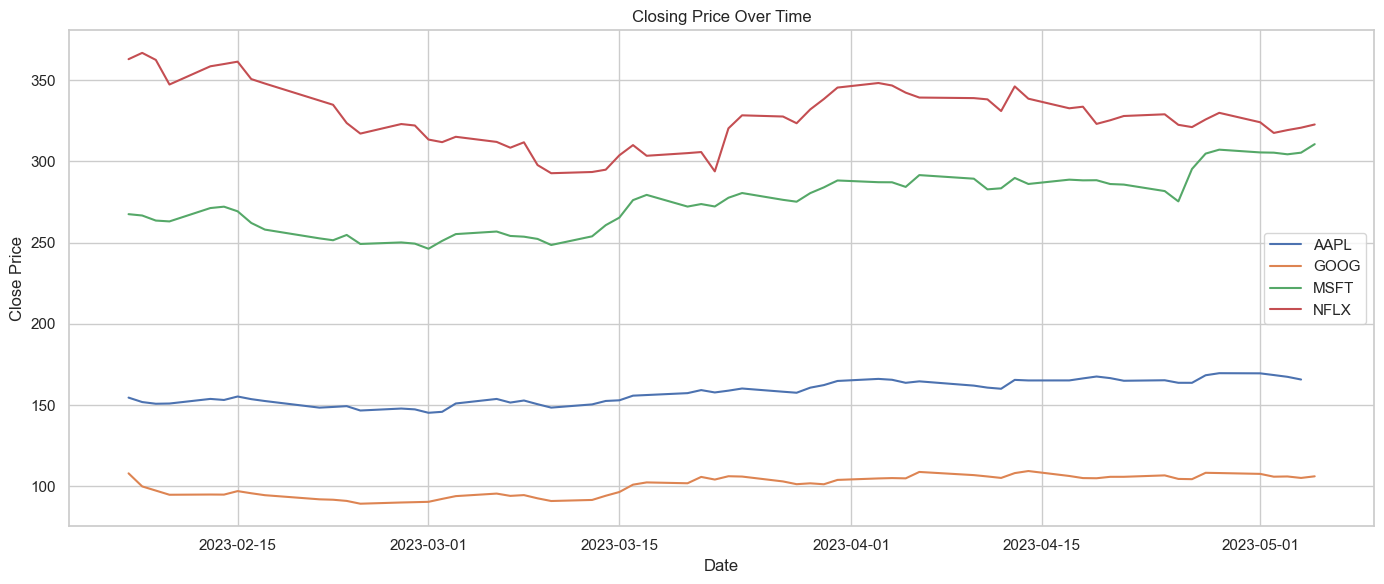

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.figure(figsize=(14, 6))

for ticker in df['Ticker'].unique():
    ticker_data = df[df['Ticker'] == ticker]
    plt.plot(ticker_data.index, ticker_data['Close'], label=ticker)

plt.title('Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.tight_layout()
plt.show()


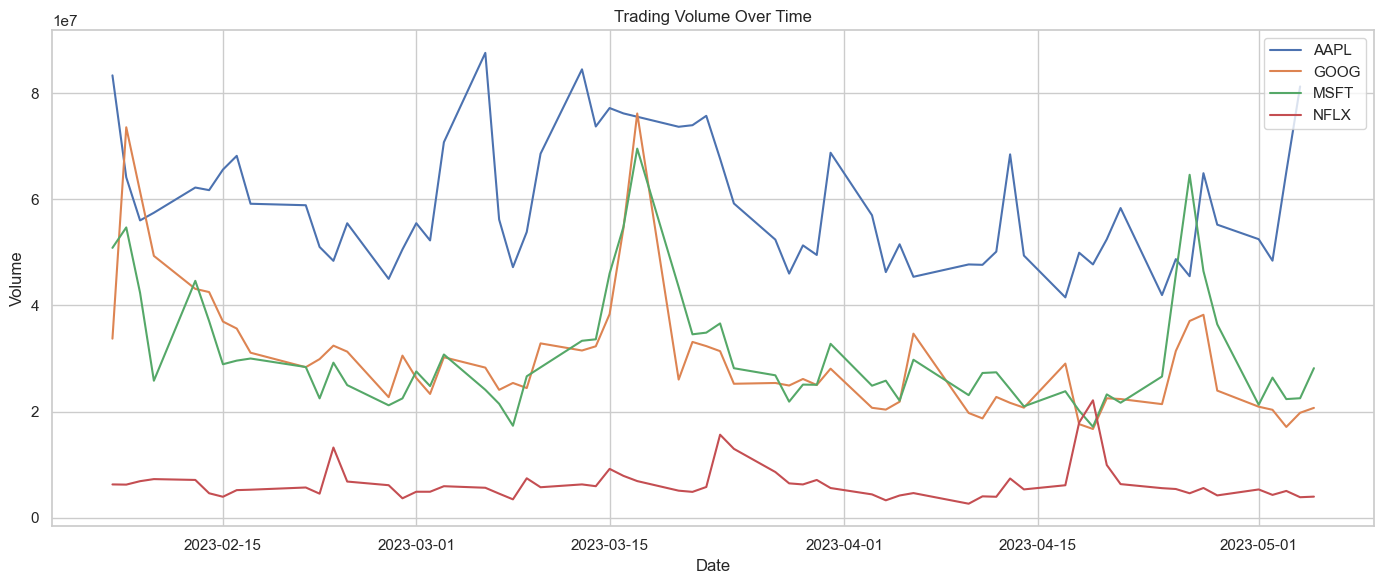

In [10]:
plt.figure(figsize=(14, 6))

for ticker in df['Ticker'].unique():
    ticker_data = df[df['Ticker'] == ticker]
    plt.plot(ticker_data.index, ticker_data['Volume'], label=ticker)

plt.title('Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.tight_layout()
plt.show()

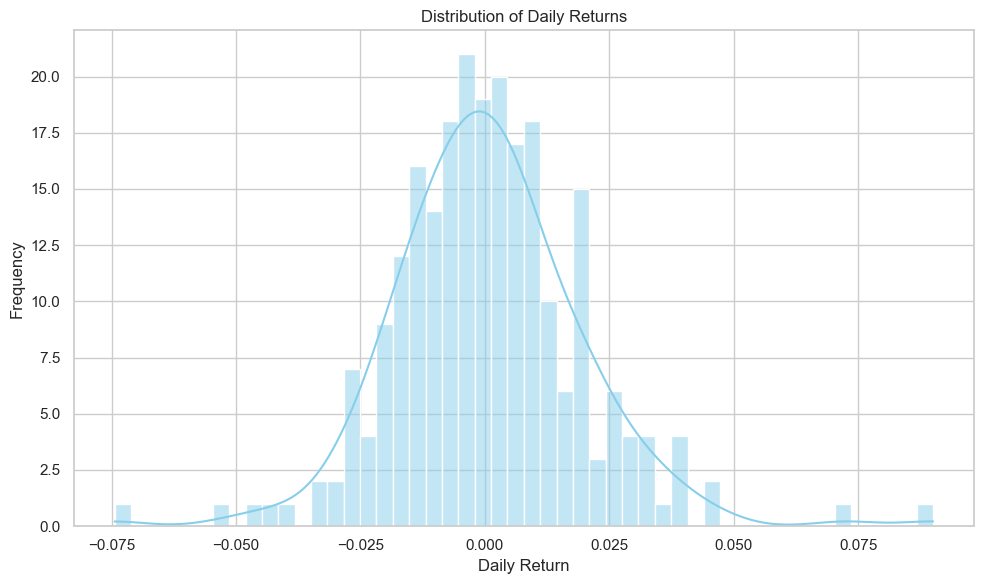

In [11]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Daily Return'].dropna(), bins=50, kde=True, color='skyblue')
plt.title('Distribution of Daily Returns')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


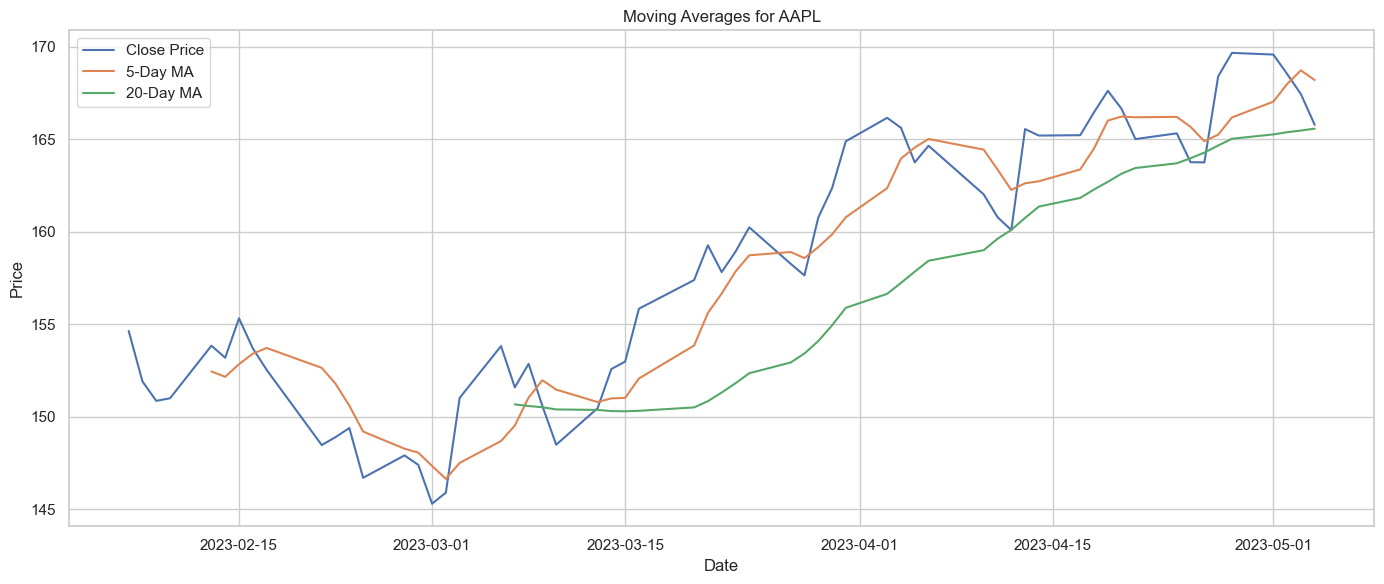

In [12]:
plt.figure(figsize=(14, 6))
ticker = df['Ticker'].unique()[0]  # Change to any ticker you want to plot
ticker_data = df[df['Ticker'] == ticker]

plt.plot(ticker_data.index, ticker_data['Close'], label='Close Price')
plt.plot(ticker_data.index, ticker_data['MA_5'], label='5-Day MA')
plt.plot(ticker_data.index, ticker_data['MA_20'], label='20-Day MA')

plt.title(f'Moving Averages for {ticker}')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.tight_layout()
plt.show()


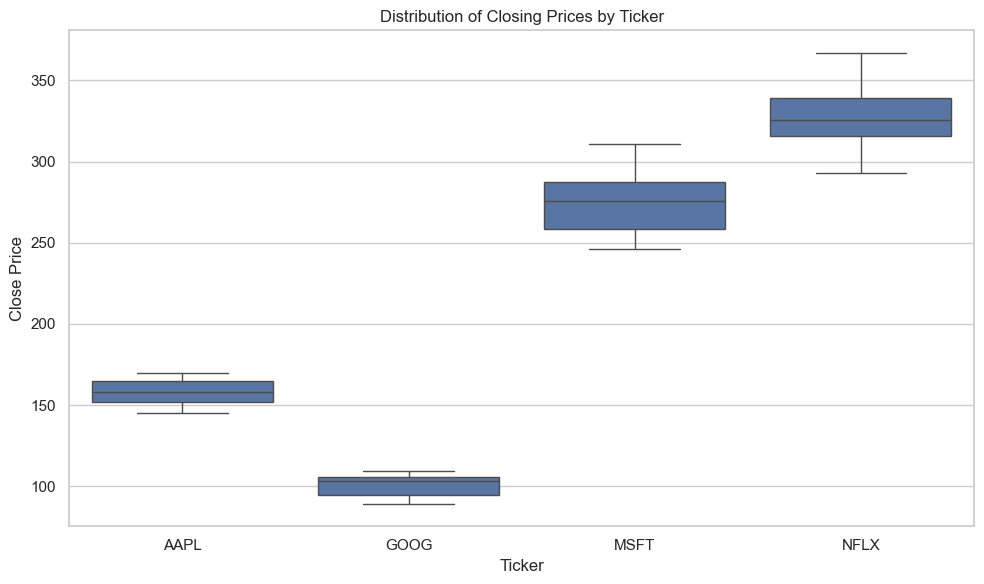

In [13]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df.reset_index(), x='Ticker', y='Close')
plt.title('Distribution of Closing Prices by Ticker')
plt.xlabel('Ticker')
plt.ylabel('Close Price')
plt.tight_layout()
plt.show()


In conclusion, the stock dataset has been successfully cleaned by converting date formats, removing duplicates, handling outliers, and ensuring valid numerical entries. The data was then organized through grouping, sorting, calculating daily returns, and generating moving averages to enhance its analytical depth. Finally, a series of insightful visualizations—such as line plots for closing prices and volumes, histograms for return distributions, and moving average trend lines—were created to explore stock performance over time. These steps collectively provide a solid foundation for deeper financial analysis, forecasting, or strategy development.